In [152]:
import glob
from plot_function import *
from skimage.transform import probabilistic_hough_line
from skimage import io, exposure, filters, morphology
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.feature import canny

plt.rcParams['figure.dpi'] = 300

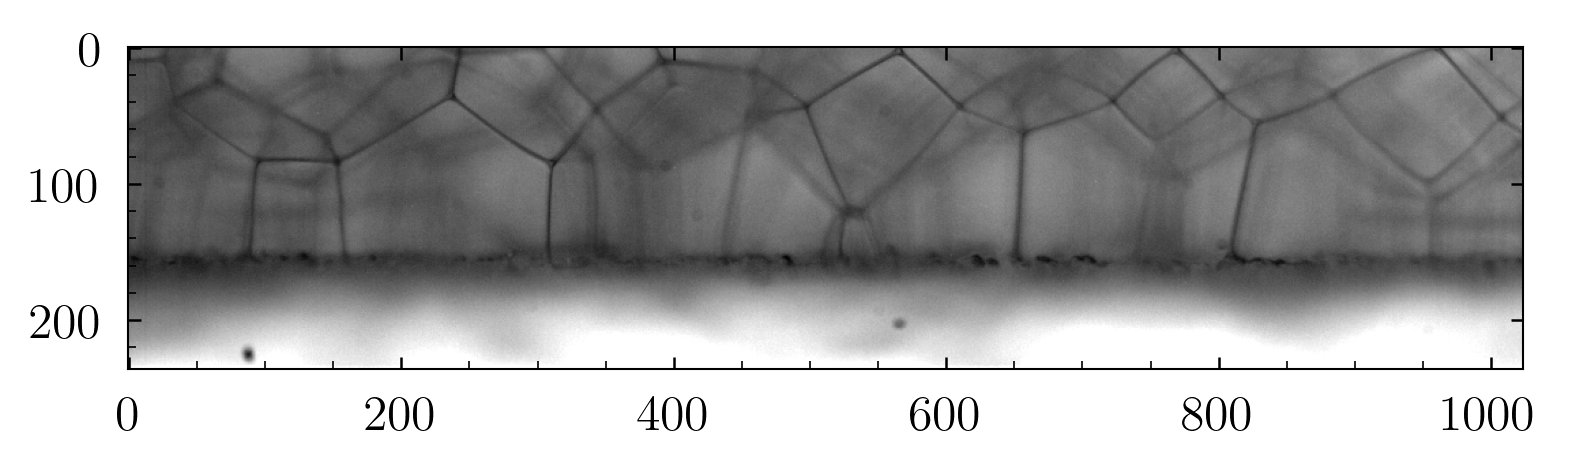

In [186]:
random_image = io.imread(glob.glob('*.png')[25])
plt.imshow(random_image[900:, :], cmap='gray')

In [187]:
cropped = random_image[900:, :]

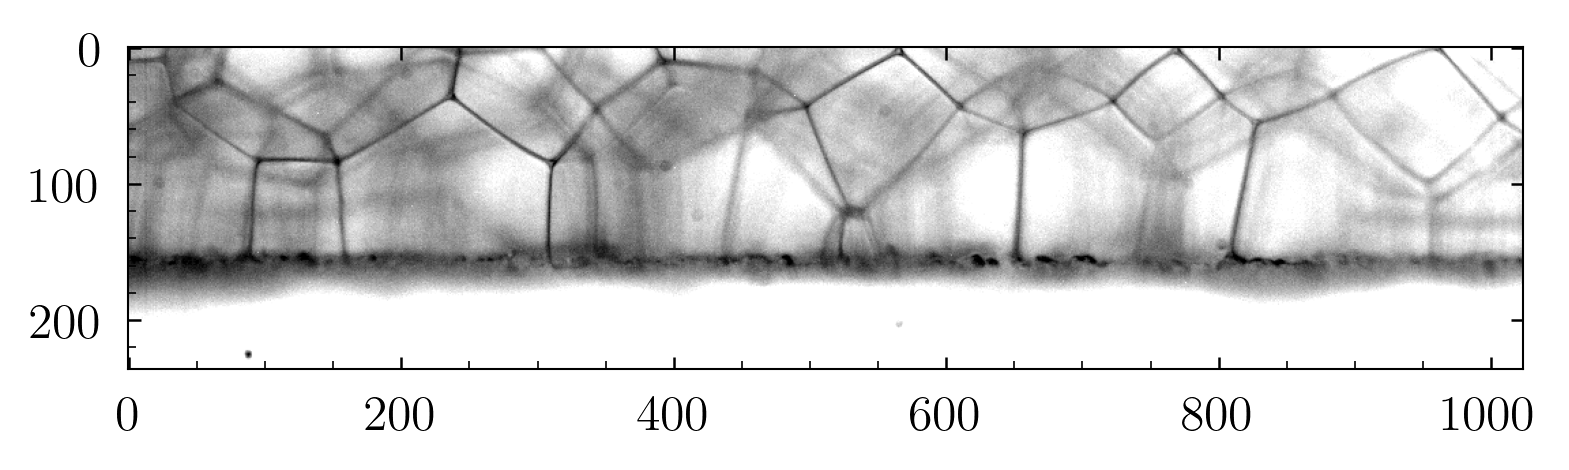

In [188]:
percentiles = np.percentile(cropped, (0.1, 70))
scaled = exposure.rescale_intensity(cropped,
                                    in_range=tuple(percentiles))

plt.imshow(scaled, cmap='gray')

# gaussian blurr

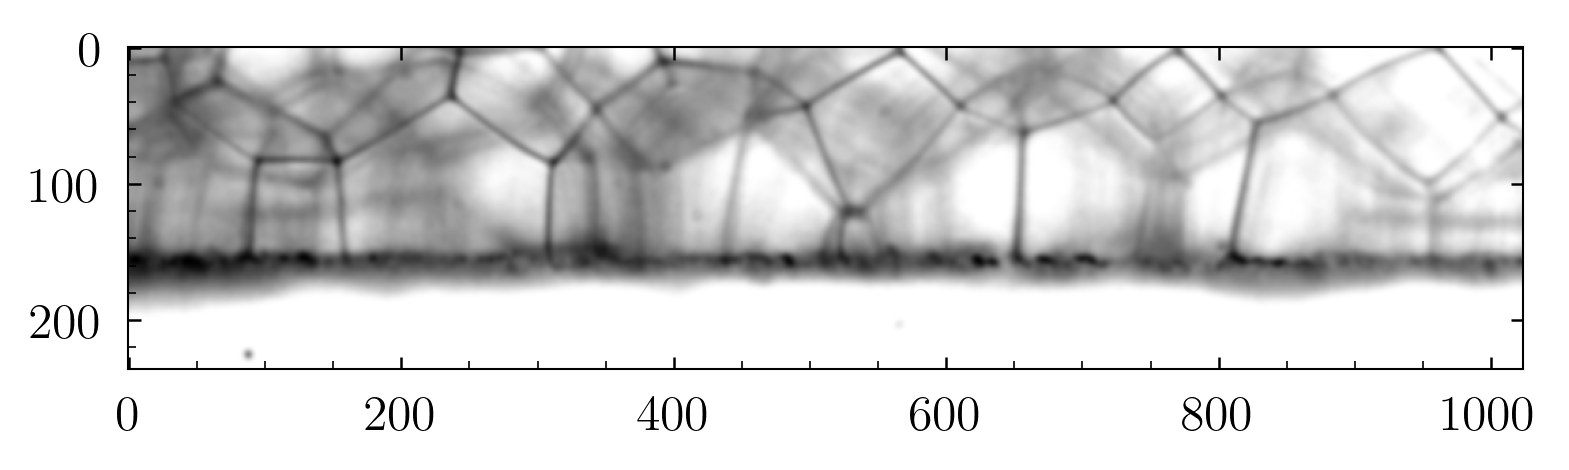

In [189]:
plt.imshow(filters.gaussian(scaled, sigma=2), cmap='gray')

gauss_blur = filters.gaussian(scaled, sigma=2)

# Try Wiener filter

In [190]:
from skimage import color, data, restoration

from scipy.signal import convolve2d
psf = np.ones((3, 3)) / 5
deconvolved_img = restoration.wiener(gauss_blur, psf, 0.001)

In [191]:
psf

array([[0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2]])

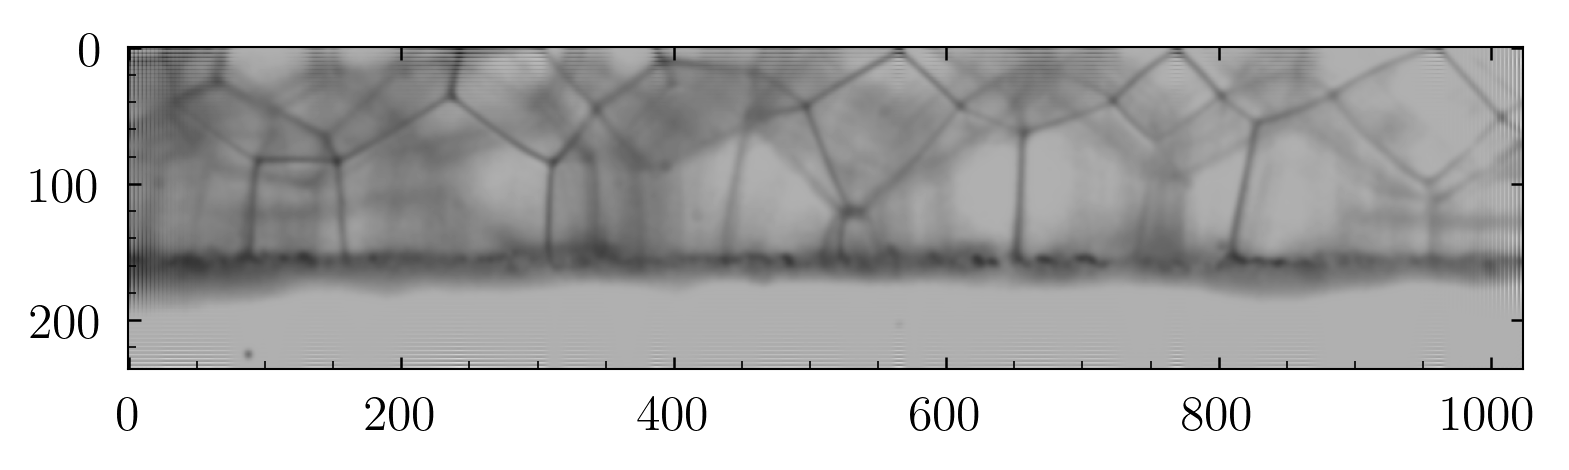

In [192]:
plt.imshow(deconvolved_img, cmap='gray')

In [193]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [194]:
def detect_ridges(img, sigma=3.0):
    H_elems = hessian_matrix(img, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

In [195]:
def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True)
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

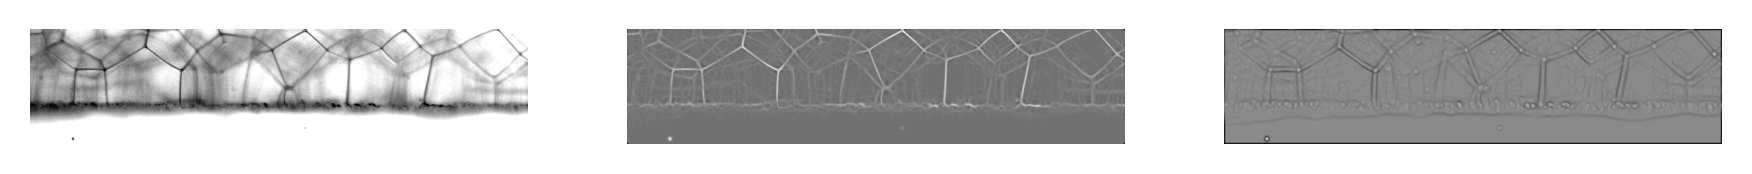

In [196]:
a, b = detect_ridges(gauss_blur, sigma=0.5)

plot_images(scaled, a, b)

In [197]:
a = (a - a.min())/(a - a.min()).max()

In [198]:
from skimage.filters import try_all_threshold

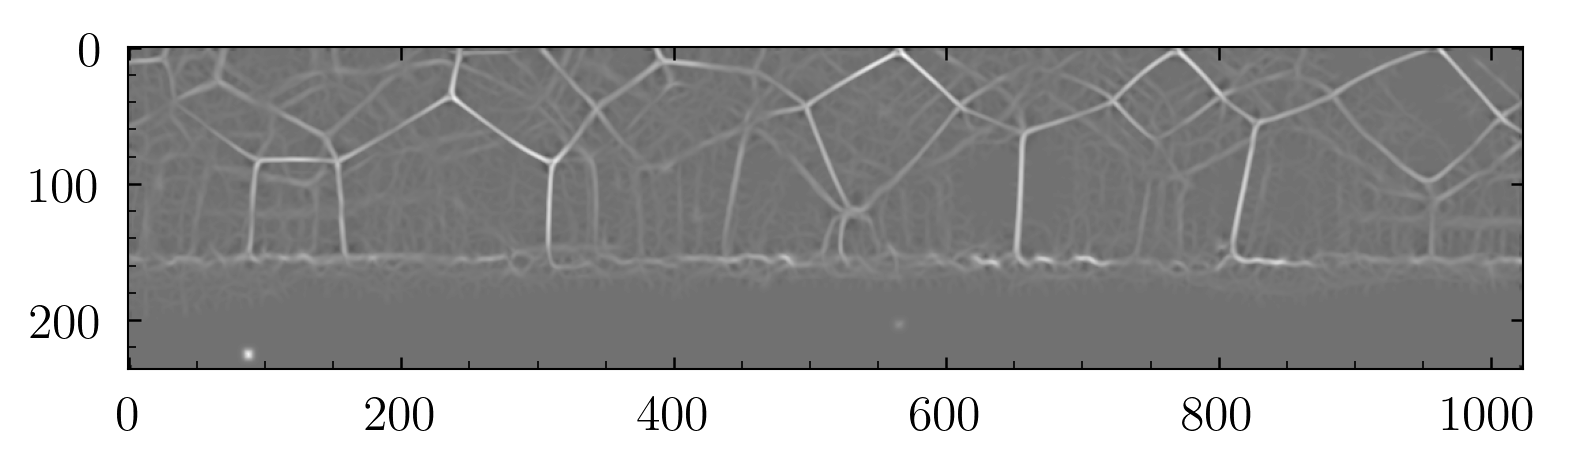

In [199]:
plt.imshow(a, cmap='gray')

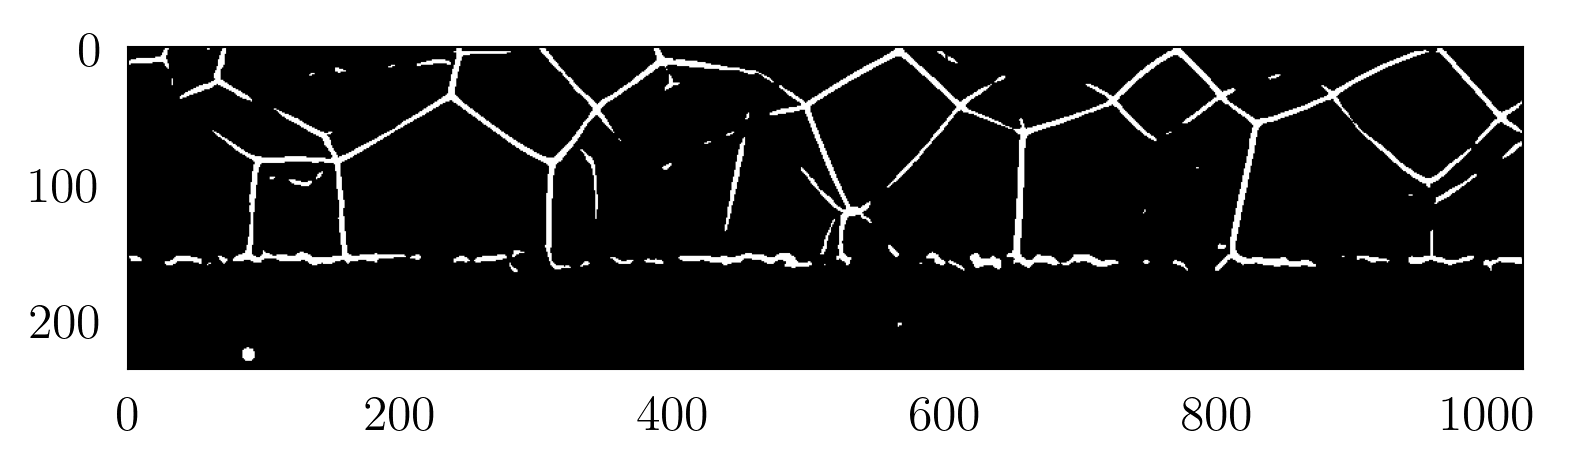

In [200]:
thresh = threshold_otsu(a)

binary_a = a > thresh

plt.imshow(binary_a, cmap='gray')

In [201]:
from skimage.morphology import skeletonize

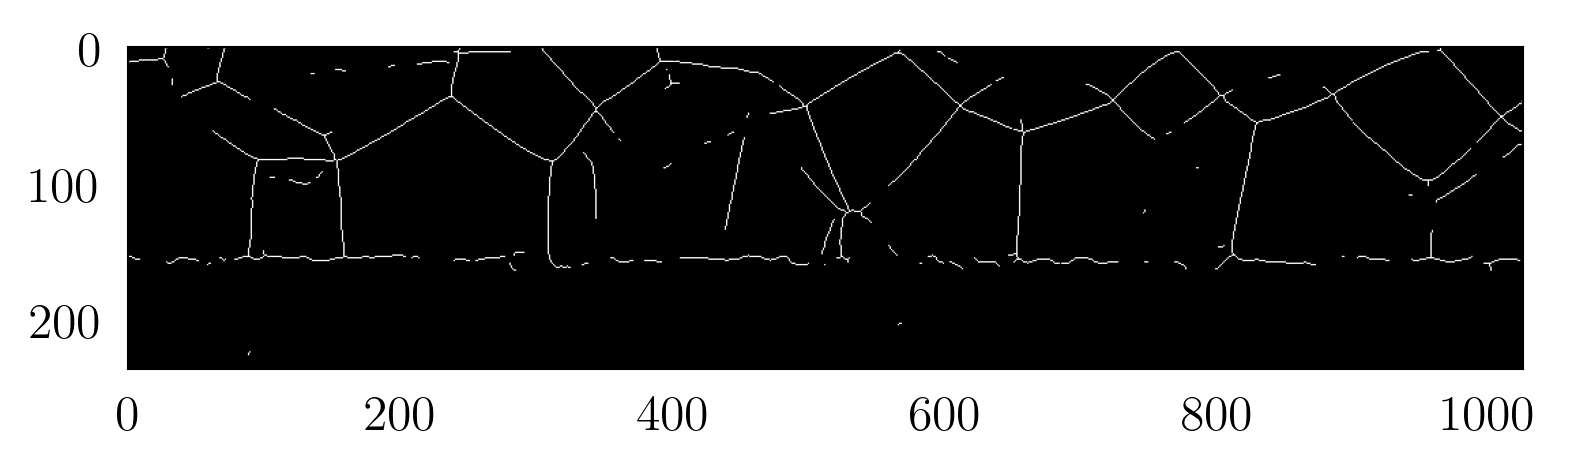

In [202]:
skeleton = skeletonize(binary_a)

plt.imshow(skeleton, cmap='gray')

In [203]:
div = 12
hough_end = 0 + math.pi/div
hough_start = 0 - math.pi/div

lines = probabilistic_hough_line(skeleton, threshold=20, line_length=30,
                                 line_gap=10, theta=np.arange(hough_start, hough_end, 0.001))

In [204]:
len(lines)

12

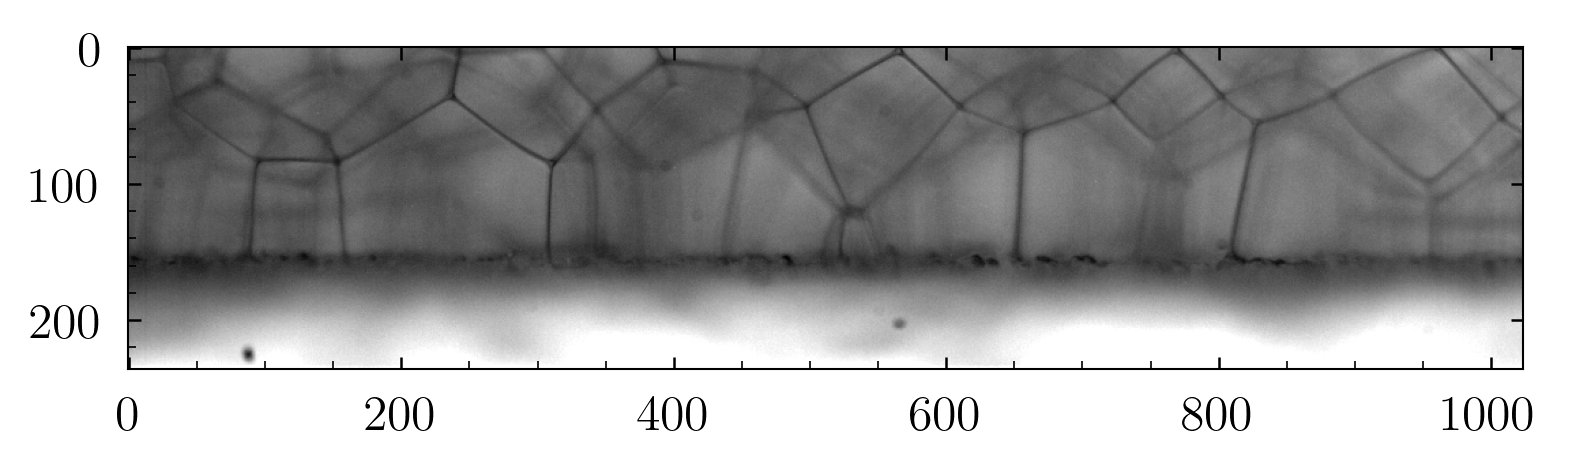

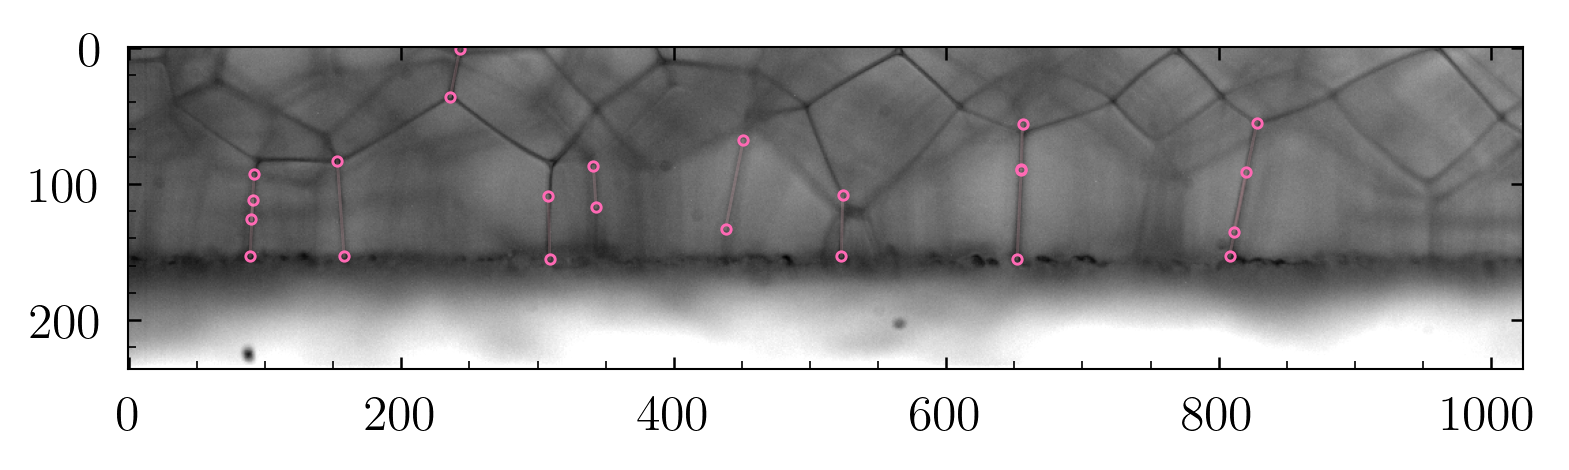

In [205]:
plt.imshow(cropped, cmap='gray')
plt.show(); plt.close();

for line in lines:
    p0, p1 = line
    if True :#p1[1] < 160 and p1[1] > 120: 
        plt.imshow(cropped, cmap='gray')
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]), ls='-', marker='', c='pink', alpha=0.2)
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]), ls='', marker='.', c='hotpink', alpha=1)
#plt.xlim((0, edges.shape[1]))
#plt.ylim((edges.shape[0], 0))

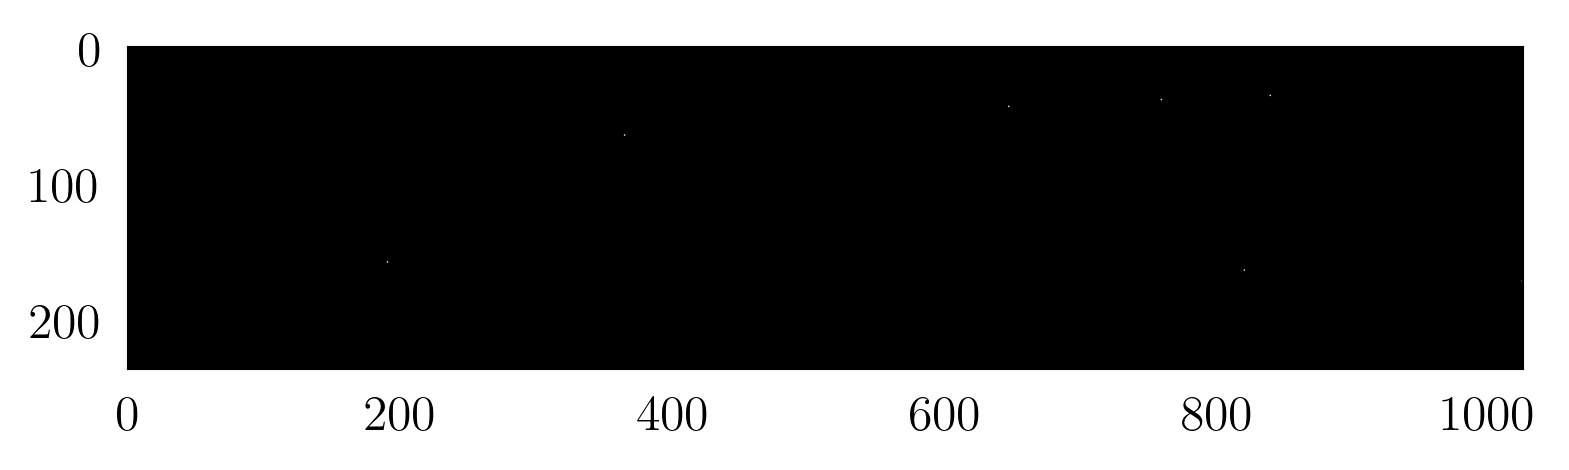

In [137]:
plt.imshow(morphology.erosion(skeleton, morphology.square(2)), cmap='gray')

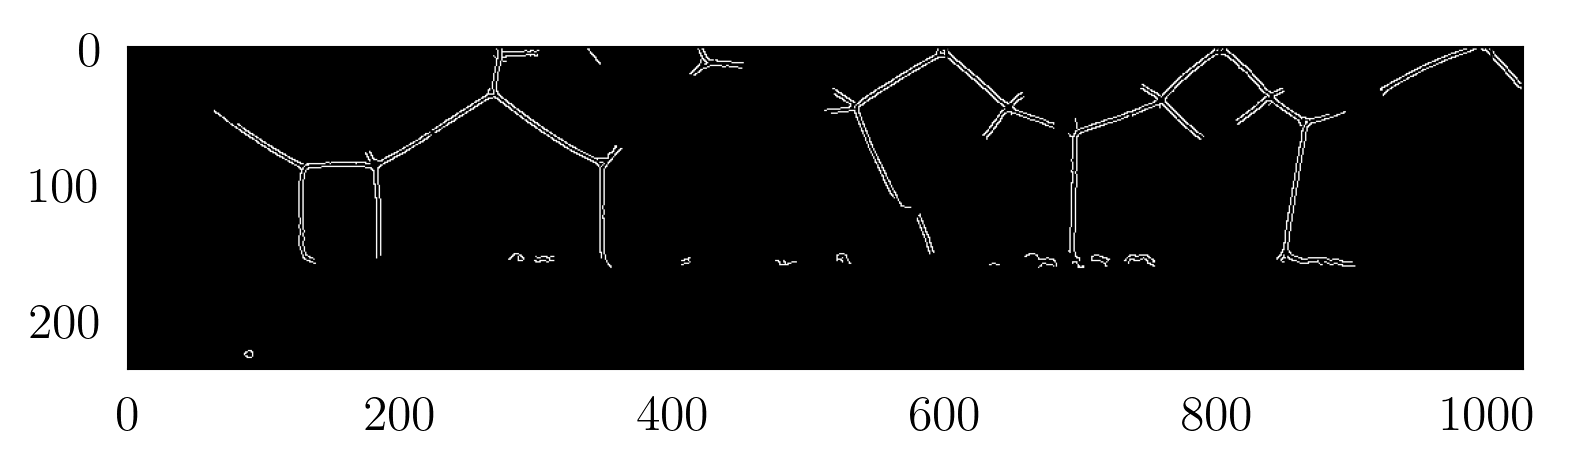

In [48]:
plt.imshow(canny(a), cmap='gray')

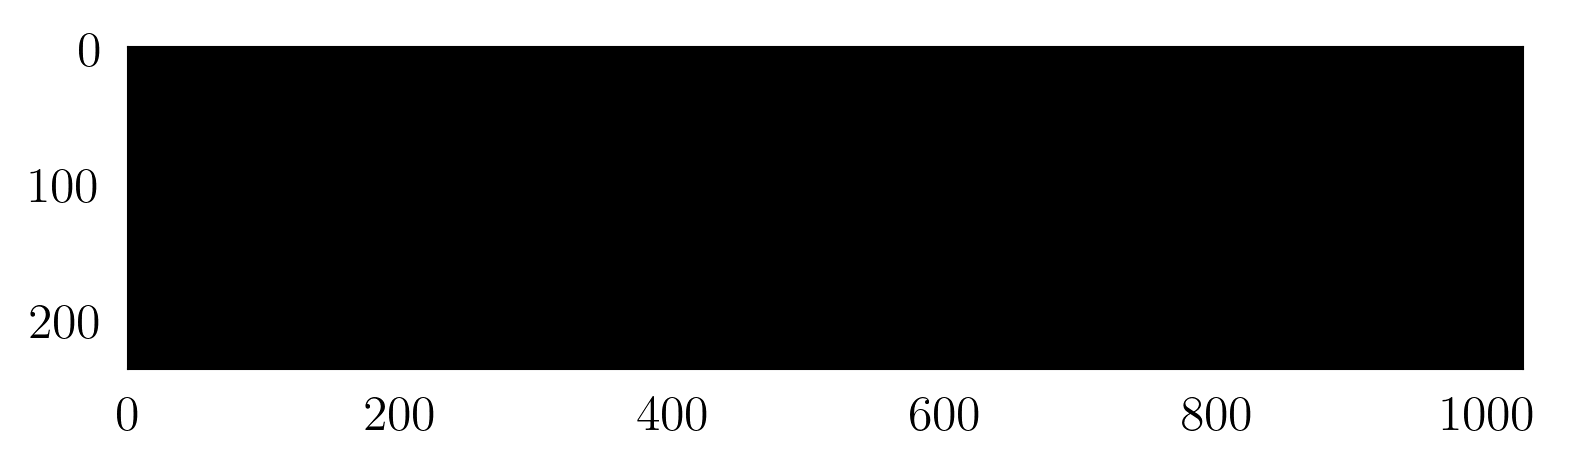

In [42]:
plt.imshow(a, cmap='gray')

percentiles = np.percentile(cropped, (0.1, 99.9))

plt.imshow(exposure.rescale_intensity(a,
                                    in_range=tuple(percentiles)), cmap='gray')

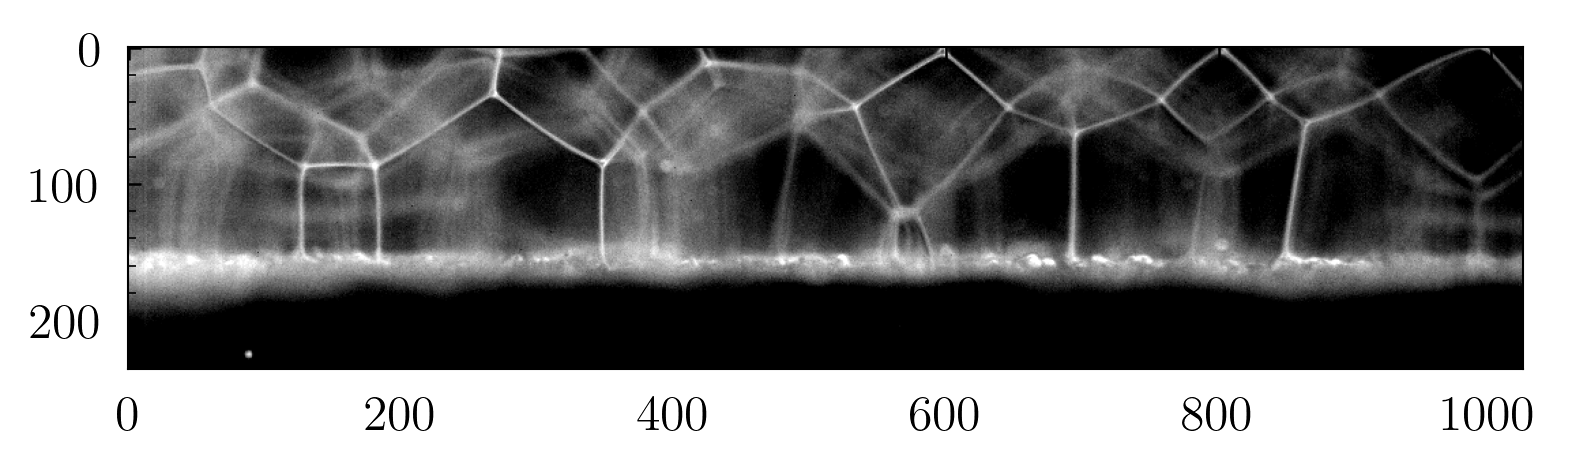

In [43]:
invert = np.invert(scaled)

plt.imshow(invert, cmap='gray')

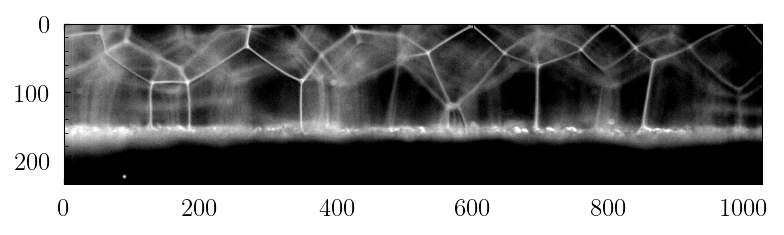

In [11]:
from skimage.filters import threshold_otsu

invert[invert < 0.2] = 0


plt.imshow(invert, cmap='gray')

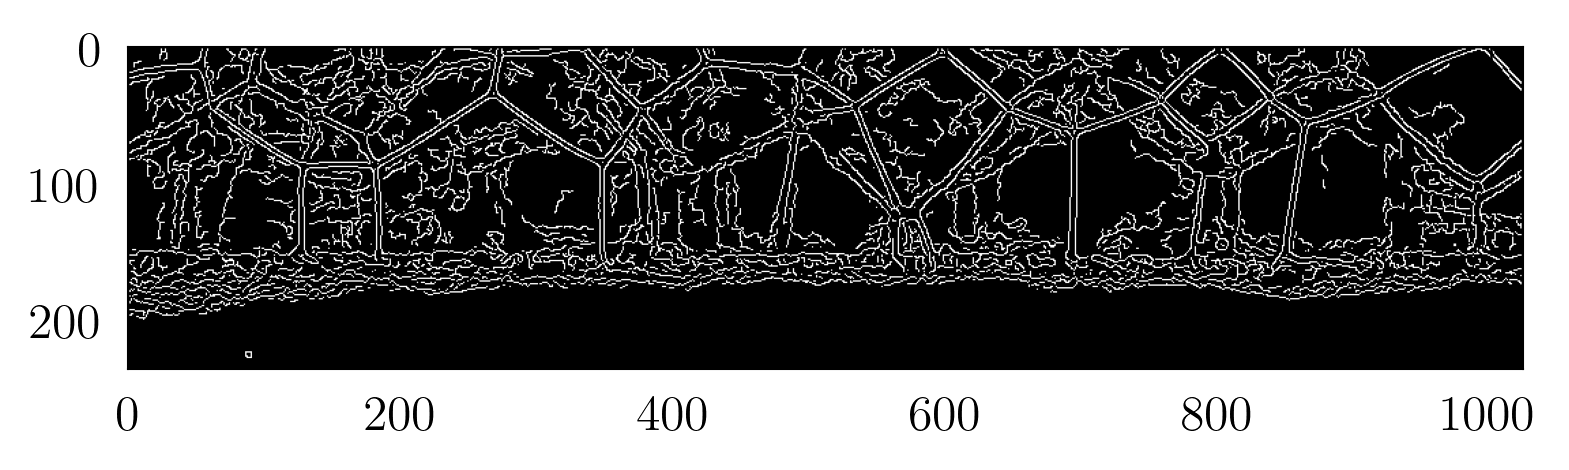

In [44]:
edges = canny(scaled)

plt.imshow(edges, cmap='gray')

In [45]:
div = 12
hough_end = 0 + math.pi/div
hough_start = 0 - math.pi/div

lines = probabilistic_hough_line(a, threshold=30, line_length=60,
                                 line_gap=1, theta=np.arange(hough_start, hough_end, 0.001))

In [46]:
len(lines)

1176

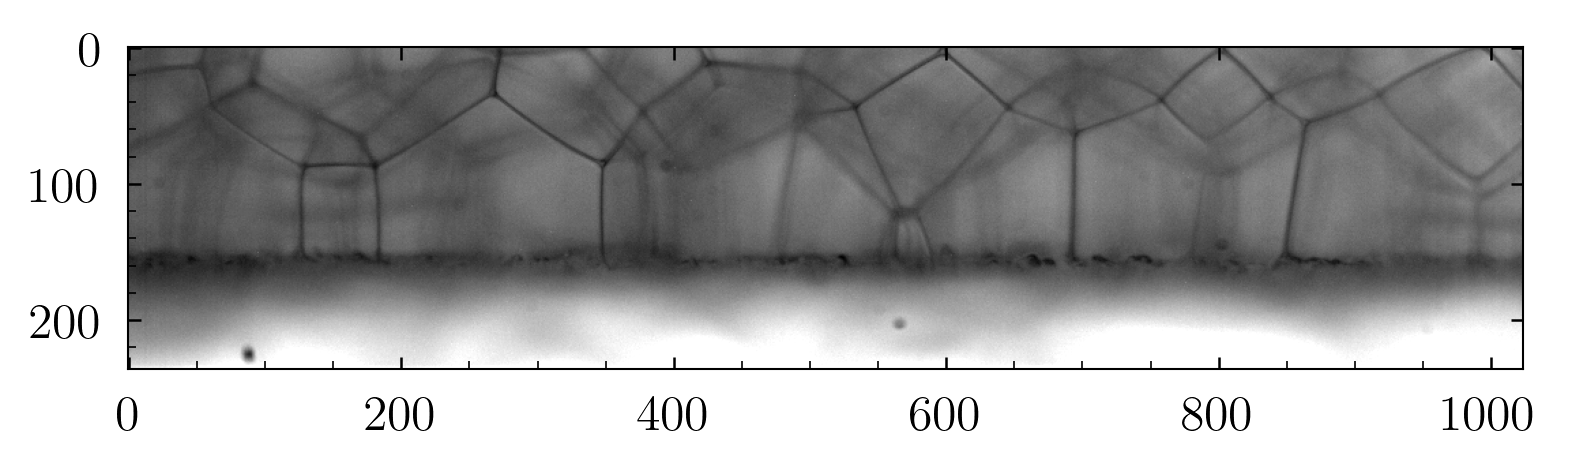

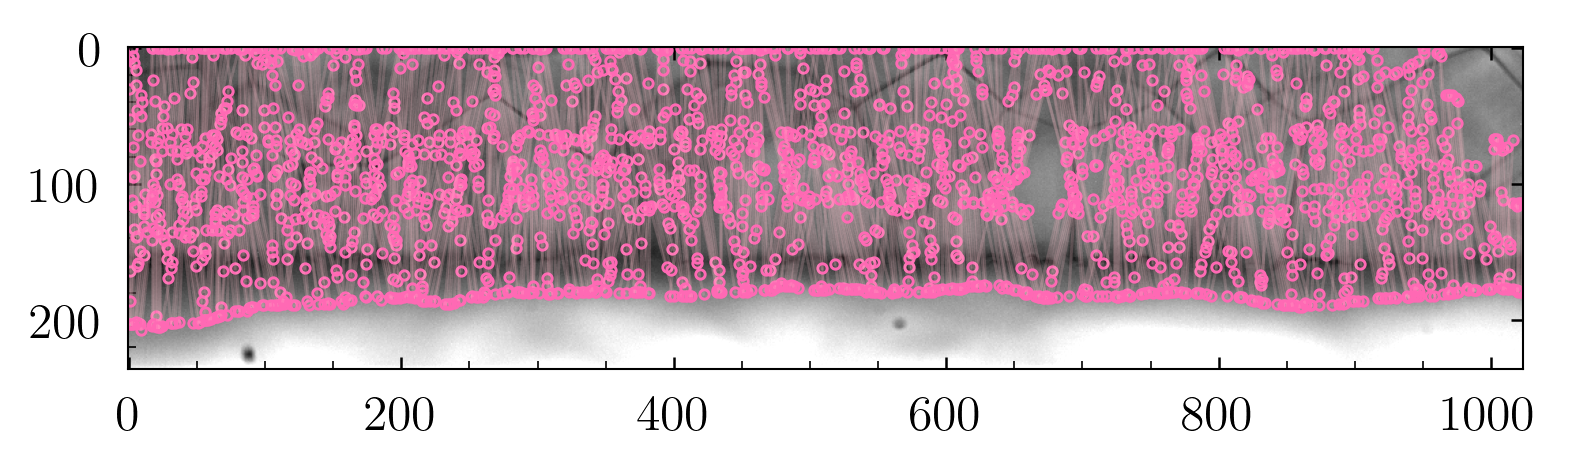

In [47]:
plt.imshow(cropped, cmap='gray')
plt.show(); plt.close();

for line in lines:
    p0, p1 = line
    if True :#p1[1] < 160 and p1[1] > 120: 
        plt.imshow(cropped, cmap='gray')
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]), ls='-', marker='', c='pink', alpha=0.2)
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]), ls='', marker='.', c='hotpink', alpha=1)
#plt.xlim((0, edges.shape[1]))
#plt.ylim((edges.shape[0], 0))


Text(0.5, 1.0, 'Probabilistic Hough')

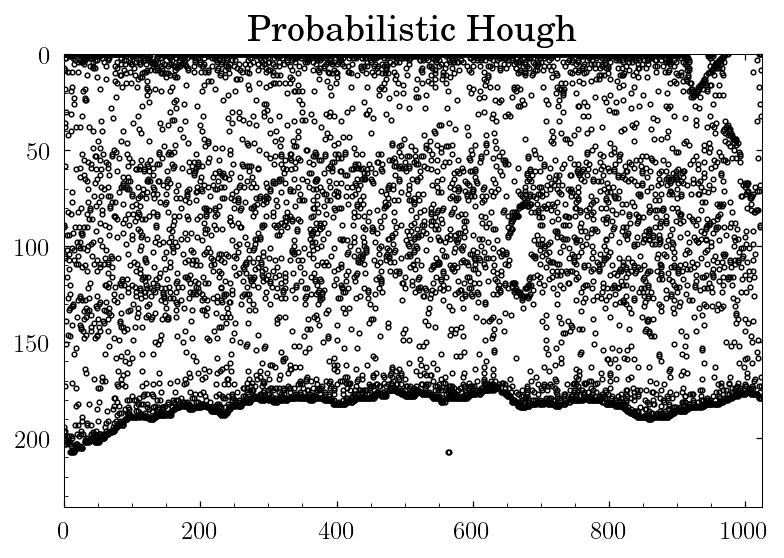

In [16]:
for line in lines:
    p0, p1 = line
    if True :#p1[1] < 160 and p1[1] > 120: 
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]), ls='', marker='.', c='k')
plt.xlim((0, edges.shape[1]))
plt.ylim((edges.shape[0], 0))
plt.title('Probabilistic Hough')